# Census Income Data Set 

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

# Load the Data

In [2]:
col_names=['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'inc_class']


In [3]:
ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)
ds.head()

C:\Users\isa_a\AppData\Local\Temp\ipykernel_21416\41874643.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,inc_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
ds.shape

(32561, 15)

# Basics of Data Analytics

## Descriptive statistics

In [5]:
ds.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
ds.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,inc_class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [7]:
def cv(series):
    return np.std(series)/np.mean(series)
    
def desc(ds):
    #fill NAs with 0
    ds.fillna(0)
    
    #create data frame for output
    stat_ds=pd.DataFrame()
    
    #calculated parameters
    params={'Mean':np.mean,
            'Median':np.median,
            'Mode': stats.mode,#returns mode value and count
           'Standard error': stats.sem,
            'Standard deviation':np.std,
            'Variance':np.var,
            'Coefficient of variation':cv,
            'Skewness':stats.skew,
            'Kurtosis':stats.kurtosis,
            'Min':np.min,
            'Max':np.max,
            'Range':np.ptp,
            'Sum':np.sum,
            'Count':len,
           }
    stat_ds['Parameters']=params.keys()
    
    for c in ds.columns:
        if ds[c].dtype!='object':
            p=[]
            for s in params.keys():
                p.append(params[s](ds[c]))
            stat_ds[c]=p
    return stat_ds
desc(ds)            

C:\Users\isa_a\AppData\Local\Temp\ipykernel_21416\2635724376.py:33: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  p.append(params[s](ds[c]))
C:\Users\isa_a\AppData\Local\Temp\ipykernel_21416\2635724376.py:33: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  p.append(

,Parameters,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,Mean,38.581647,189778.366512,10.080679,1077.648844,87.30383,40.437456
1,Median,37.0,178356.0,10.0,0.0,0.0,40.0
2,Mode,"([36], [898])","([123011], [13])","([9], [10501])","([0], [29849])","([0], [31042])","([40], [15217])"
3,Standard error,0.075593,584.93725,0.014258,40.927838,2.233126,0.068427
4,Standard deviation,13.640223,105548.356881,2.572681,7385.178677,402.954031,12.347239
5,Variance,186.055686,11140455640.255911,6.618687,54540864.090427,162371.95096,152.454313
6,Coefficient of variation,0.353542,0.556166,0.255209,6.853047,4.615537,0.305342
7,Skewness,0.558718,1.446913,-0.311662,11.953297,4.594417,0.227632
8,Kurtosis,-0.166286,6.217672,0.623164,154.775484,20.373489,2.916055
9,Min,17,12285,1,0,0,1


In [9]:
13.640223/(32561**(0.5))

0.07559143734584034

In [10]:
13.640223**2

186.055683489729

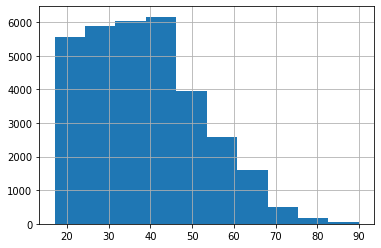

In [8]:
ds.age.hist()

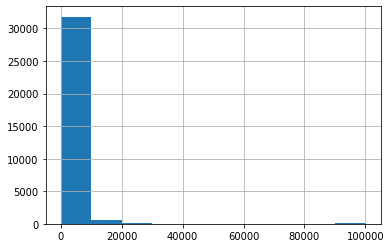

In [9]:
ds['capital-gain'].hist()

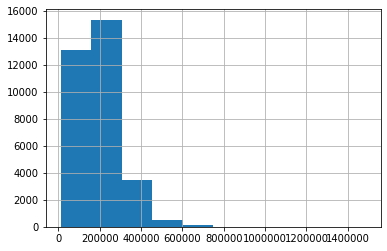

In [10]:
ds.fnlwgt.hist()

# Statistics description
## Measures of Central Tendency
### Mean
The mean is calculated as
\begin{align*}
\mu = \dfrac{\sum_{i=1}^{N} x_i}{N}
\end{align*} 
### Median
The median value is the middlemost value, you take the value in the position of
\begin{align*}
\dfrac{n+1}{2}
\end{align*} 
of the sorted data.

### Mode
The mode is the most frequent value.

## Standard error
The standard error of the mean (SE of the mean) estimates the variability between sample means that you would obtain if you took multiple samples from the same population. The standard error of the mean estimates the variability between samples whereas the standard deviation measures the variability within a single sample.

It is calculated as:
\begin{align*}
SE = \dfrac{s}{\sqrt{n}}
\end{align*}
Where s is the sample standard deviation. 

## Standard deviation
The variance can get very large for large data sets and so we will often use the standard deviation, which is the square root of the variance:
\begin{align*}
\sigma = \sqrt{\sigma^2}
\end{align*}
68.2% of the data falls within 1 standard deviation of the mean, 95.4% falls within 2 standard deviations of the mean, and 99.7% falls within 3 standard deviations.

## Variance
Variance is a measure of how variable the data is, it is calculated as:
\begin{align*}
\sigma^2 = \dfrac{\sum_{i=1}^{N} (x_i – \mu)^2}{N}
\end{align*}

## Coefficient of variation
The coefficient of variation (CV) is defined as the ratio of the standard deviation to the mean. It shows the extent of variability in relation to the mean of the population. 
\begin{align*}
cv=\sigma/\mu
\end{align*}

## Skewness
In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined.

## Kurtosis
In probability theory and statistics, kurtosis (from Greek: κυρτός, kyrtos or kurtos, meaning "curved, arching") is a measure of the "tailedness" of the probability distribution of a real-valued random variable.

## Min
Minimum value

## Max	
Maximum value

## Range
The range gives a measure of how spread apart the values are.

The range is simply calculated as the maximum value – minimum value
\begin{align*}
Max(xi)–Min(xi)
\end{align*}


## Sum
Simply sum of all values

## Count	
Number of values processed

*Sources:*
http://benalexkeen.com/basic-statistics-in-python/
https://en.wikipedia.org/wiki/Kurtosis
https://en.wikipedia.org/wiki/Skewness

# Correlation analysis

In [11]:
ds.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


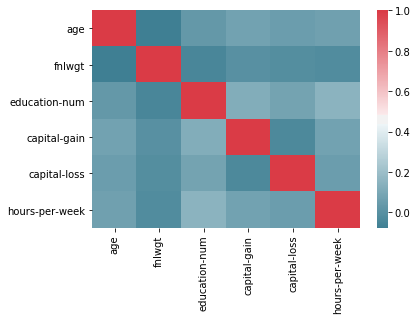

In [12]:
import seaborn as sns
corr=ds.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

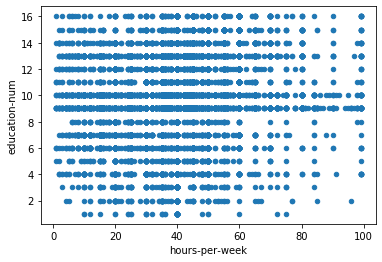

In [13]:
ds.plot(x='hours-per-week',y='education-num', kind='scatter')

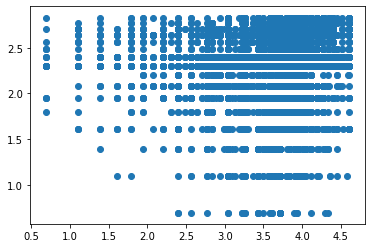

In [14]:
plt.scatter(np.log(ds['hours-per-week']+1), np.log(ds['education-num']+1))

# Regression analysis

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
num_cols=ds.dtypes[ds.dtypes!='object'].index

In [17]:
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        x=np.array(ds[num_cols[i]]).reshape(-1, 1)
        y=np.array(ds[num_cols[j]])
        lm=LinearRegression().fit(x,y)
        print(num_cols[i],num_cols[j],lm.score(x,y))

age age 1.0
age fnlwgt 0.005874589062318081
age education-num 0.0013342355701466688
age capital-gain 0.006033327665338484
age capital-loss 0.003337897412008184
age hours-per-week 0.004727347315139907
fnlwgt age 0.005874589062318192
fnlwgt fnlwgt 1.0
fnlwgt education-num 0.0018657762969407354
fnlwgt capital-gain 1.8652533684271333e-07
fnlwgt capital-loss 0.00010509759227461667
fnlwgt hours-per-week 0.00035225623980572607
education-num age 0.001334235570146669
education-num fnlwgt 0.0018657762969406244
education-num education-num 1.0
education-num capital-gain 0.015038145029427463
education-num capital-loss 0.006387679005536162
education-num hours-per-week 0.021940343919678695
capital-gain age 0.006033327665339039
capital-gain fnlwgt 1.8652533695373563e-07
capital-gain education-num 0.015038145029427796
capital-gain capital-gain 1.0
capital-gain capital-loss 0.0009995122054740069
capital-gain hours-per-week 0.006147910967398418
capital-loss age 0.0033378974120075173
capital-loss fnlwgt 0

In [18]:
for y in ds[num_cols]:
    print(ds[y])

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64
0         77516
1         83311
2        215646
3        234721
4        338409
          ...  
32556    257302
32557    154374
32558    151910
32559    201490
32560    287927
Name: fnlwgt, Length: 32561, dtype: int64
0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name: education-num, Length: 32561, dtype: int64
0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: capital-gain, Length: 32561, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: capital-loss, Length: 32561, dtype: int64
0        40
1        13
2        40
3        40


In [19]:
ds_reg=pd.DataFrame()
for i in range(len(num_cols)):
    x=np.array(ds[num_cols[i]]).reshape(-1, 1)
    ds_reg[num_cols[i]]=[LinearRegression(normalize=True).fit(x,ds[y]).score(x,ds[y]) for y in num_cols]
ds_reg.index=num_cols
ds_reg

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,5.874589e-03,0.001334,6.033328e-03,0.003338,0.004727
fnlwgt,0.005875,1.000000e+00,0.001866,1.865253e-07,0.000105,0.000352
education-num,0.001334,1.865776e-03,1.000000,1.503815e-02,0.006388,0.021940
capital-gain,0.006033,1.865253e-07,0.015038,1.000000e+00,0.001000,0.006148
capital-loss,0.003338,1.050976e-04,0.006388,9.995122e-04,1.000000,0.002944
hours-per-week,0.004727,3.522562e-04,0.021940,6.147911e-03,0.002944,1.000000


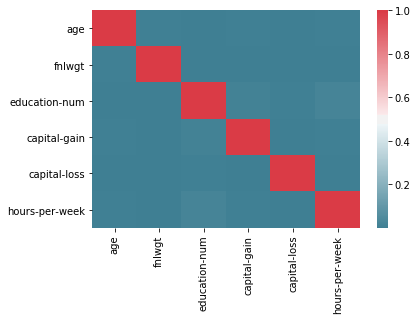

In [20]:
sns.heatmap(ds_reg, xticklabels=ds_reg.columns, yticklabels=ds_reg.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [21]:


for c in num_cols:
    x=ds[num_cols].drop(c, axis=1)
    y=ds[c]
    lm=LinearRegression().fit(x,y)
    print(c,lm.score(x,y))

age 0.0189563802541447
fnlwgt 0.007710614506635794
education-num 0.04184274968099355
capital-gain 0.02600776713688535
capital-loss 0.013286928854379432
hours-per-week 0.030925037420690416
